In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%matplotlib
from cycler import cycler
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np

# scikit-optimize
import skopt
from skopt.plots import *

Using matplotlib backend: TkAgg


In [2]:
def objective(params):
    pass

In [3]:
from __future__ import division

def plot_cumulative_distribution(revisions):
    Y_3000s = []
    for revision, title in revisions:  # FIXME
        label = title  # FIXME
        res = skopt.load('../generated/5.5/bayesOptResults.5.5.3.' + str(revision) + '-' + title + '.sav')
        func_vals = res.func_vals
        Y_3000s.append((-np.array([i for i in func_vals]), label))

    color = plt.cm.viridis(np.linspace(0, 4, 18))
    plt.rc('axes', prop_cycle=(cycler('color', color)))  # +
                               # cycler('linestyle', ['-', '--', ':', '-.'])))

    fig = plt.gcf()
    for data, label in Y_3000s:
        values, base = np.histogram(data, bins=40)
        cumulative = np.cumsum(values) / 60
        plt.plot(base[:-1], cumulative, linewidth=4, label=label)

    plt.legend()
    plt.grid()
    plt.tick_params(top=True, direction='in')
    plt.grid(which='major', linestyle='--', alpha=0.4)
    plt.show()
    
    return fig

In [4]:
revisions = [
    # ------------------------------------------------------------- 5.5.3.1
    # ------------------------------------------- all positions, all users, all days
    (1, 'Bag'),
    (1, 'Hand'),
    (1, 'Hips'),
    (1, 'Torso'),
    
    # ------------------------------------------------------------- 5.5.3.2
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (2, 'Bag-User1'),
    (2, 'Hand-User1'),
    (2, 'Hips-User1'),
    (2, 'Torso-User1'),
    # ------------------------------------------- user2
    (2, 'Bag-User2'),
    (2, 'Hand-User2'),
    (2, 'Hips-User2'),
    (2, 'Torso-User2'),
    # ------------------------------------------- user3
    (2, 'Bag-User3'),
    (2, 'Hand-User3'),
    (2, 'Hips-User3'),
    (2, 'Torso-User3'),
    
    # ------------------------------------------------------------- 5.5.3.4
    # ------------------------------------------- all users, all days
    # ------------------------------------------- 10 folds
    (4, 'Bag-10folds'),
    (4, 'Hand-10folds'),
    (4, 'Hips-10folds'),
    # (4, 'Torso-10folds'),
    # ------------------------------------------- 5 folds
    (4, 'Bag-5folds'),
    (4, 'Hand-5folds'),
    (4, 'Hips-5folds'),
    (4, 'Torso-5folds'),
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (4, 'Bag-User1'),
    (4, 'Hand-User1'),
    (4, 'Hips-User1'),
    (4, 'Torso-User1'),
    # ------------------------------------------- user2
    (4, 'Bag-User2'),
    (4, 'Hand-User2'),
    (4, 'Hips-User2'),
    (4, 'Torso-User2'),
    # ------------------------------------------- user3
    (4, 'Bag-User3'),
    (4, 'Hand-User3'),
    (4, 'Hips-User3'),
    (4, 'Torso-User3'),
]

In [8]:
from __future__ import division

def cumDist_overAllExperiments(revisions):
    """
    """
    Y_s = { k: [] for k in revisions.keys() }
    
    for k, v in revisions.iteritems():
        Y_3000s = []
        for revision, title in v:  # FIXME
            res = skopt.load('../generated/5.5/bayesOptResults.5.5.3.' + str(revision) + '-' + title + '.sav')
            func_vals = res.func_vals
            Y_3000s = np.append(Y_3000s, -np.array([i for i in func_vals]))

        Y_s[k] = Y_3000s

    color = plt.cm.viridis(np.linspace(0, 4, 18))
    plt.rc('axes', prop_cycle=(cycler('color', color)))  # +
                               # cycler('linestyle', ['-', '--', ':', '-.'])))

    fig = plt.gcf()
    
    for label, data in Y_s.iteritems():
        value, base = np.histogram(data, bins=500)
        cumulative = np.cumsum(value) / len(data)
        plt.plot(base[:-1], cumulative, linewidth=4, label=label)

    plt.legend()
    plt.grid()
    plt.tick_params(top=True, direction='in')
    plt.grid(which='major', linestyle='--', alpha=0.4)
    plt.show()
    
    return fig

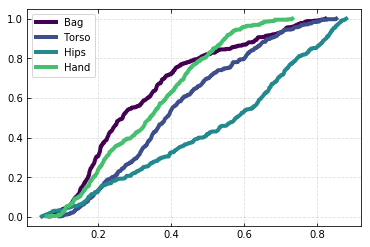

In [10]:
# cumulative distribution of each generator over all experiments
revisions = {
    'Bag': [
        (1, 'Bag'),
        
        (2, 'Bag-User1'),
        (2, 'Bag-User2'),
        (2, 'Bag-User3'),
        
        (4, 'Bag-User1'),
        (4, 'Bag-User2'),
        (4, 'Bag-User3'),
    ],
    'Hand': [
        (1, 'Hand'),
        
        (2, 'Hand-User1'),
        (2, 'Hand-User2'),
        (2, 'Hand-User3'),

        (4, 'Hand-User1'),
        (4, 'Hand-User2'),
        (4, 'Hand-User3'), 
    ],
    'Hips': [
        (1, 'Hips'),
        
        (2, 'Hips-User1'),
        (2, 'Hips-User2'),
        (2, 'Hips-User3'),
        
        (4, 'Hips-User1'),
        (4, 'Hips-User2'),
        (4, 'Hips-User3'),
    ],
    'Torso': [
        (1, 'Torso'),
        
        (2, 'Torso-User1'),
        (2, 'Torso-User2'),
        (2, 'Torso-User3'),
        
        (4, 'Torso-User1'),
        (4, 'Torso-User2'),
        (4, 'Torso-User3'),
    ]
}
fig = cumDist_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('cumulative probability')
fig.suptitle('Performances on each generator over all experiments')
fig.savefig("./cumulatives/cumDist_of_each_generator_overAllExperiments.svg", format="svg")

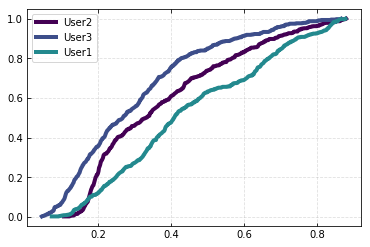

In [11]:
# cumulative distribution of each user over all experiments
revisions = {
    'User1': [
        (2, 'Bag-User1'),
        (4, 'Bag-User1'),
        (2, 'Hand-User1'),
        (4, 'Hand-User1'),
        (2, 'Hips-User1'),
        (4, 'Hips-User1'),
        (2, 'Torso-User1'),
        (4, 'Torso-User1'),
    ],
    'User2': [
        (2, 'Bag-User2'),
        (4, 'Bag-User2'),
        (2, 'Hand-User2'),
        (4, 'Hand-User2'),
        (2, 'Hips-User2'),
        (4, 'Hips-User2'),
        (2, 'Torso-User2'),
        (4, 'Torso-User2'),
    ],
    'User3': [
        (2, 'Bag-User3'),
        (4, 'Bag-User3'),
        (2, 'Hand-User3'),
        (4, 'Hand-User3'),
        (2, 'Hips-User3'),
        (4, 'Hips-User3'),
        (2, 'Torso-User3'),
        (4, 'Torso-User3'),        
    ]
}
fig = cumDist_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('cumulative probability')
fig.suptitle('Performances on data generated by each user over all experiments')
fig.savefig("./cumulatives/cumDist_of_each_user_overAllExperiments.svg", format="svg")

In [5]:
from __future__ import division

def cumDist_MeanStd_overAllExperiments(revisions):
    """
    """
    # Y_s = { k: [] for k in revisions.keys() }

    color = plt.cm.viridis(np.linspace(0, 2, 4))
    # plt.rc('axes', prop_cycle=(cycler('color', color)))
    plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
    fig = plt.gcf()
    
    num_bins = 80
    shift = 0
    shift_incr = 0.01
    
    for label, v in revisions.iteritems():
        max = 0
        min = 1
        cumulatives = []
        base = np.linspace(0, 1, num_bins) + shift
        for revision, title in v:
            res = skopt.load('../generated/5.5/bayesOptResults.5.5.3.' + str(revision) + '-' + title + '.sav')
            func_vals = res.func_vals
            data = -np.array([i for i in func_vals])
            
            curr_max = np.max(data)
            curr_min = np.min(data)
            if curr_max > max: max = curr_max
            if curr_min < min: min = curr_min

            values, base = np.histogram(data, bins=base)           
            cumulatives.append(np.cumsum(values) / len(data))
        
        mean_cumulatives = np.mean(cumulatives, axis=0)
        std_cumulatives = np.std(cumulatives, axis=0)
        
        b = (base>=min-1/num_bins) & (base<=max+2/num_bins)  # relaxing the bounds in order to not miss results
        # print(min)
        # print(max)
        # print(b)
        # print(base)
        # print(mean_cumulatives)
        
        plt.errorbar(
            # base[:-1]-shift,
            base[b],
            mean_cumulatives[b[:-1]],
            yerr=std_cumulatives[b[:-1]],
            linewidth=1,
            elinewidth=0.5, # width of error bar line
            capsize=0.5,
            label=label)
        
        shift += shift_incr

    plt.legend()
    plt.grid()
    plt.tick_params(top=True, direction='in')
    plt.grid(which='major', linestyle='--', alpha=0.4)
    plt.show()
    
    return fig

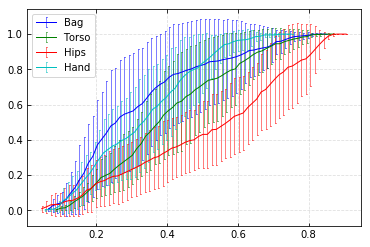

In [13]:
# cumulative distribution of each generator over all experiments (Mean + Std)
revisions = {
    'Bag': [
        (1, 'Bag'),
        
        (2, 'Bag-User1'),
        (2, 'Bag-User2'),
        (2, 'Bag-User3'),
        
        (4, 'Bag-User1'),
        (4, 'Bag-User2'),
        (4, 'Bag-User3'),
    ],
    'Hand': [
        (1, 'Hand'),
        
        (2, 'Hand-User1'),
        (2, 'Hand-User2'),
        (2, 'Hand-User3'),

        (4, 'Hand-User1'),
        (4, 'Hand-User2'),
        (4, 'Hand-User3'), 
    ],
    'Hips': [
        (1, 'Hips'),
        
        (2, 'Hips-User1'),
        (2, 'Hips-User2'),
        (2, 'Hips-User3'),
        
        (4, 'Hips-User1'),
        (4, 'Hips-User2'),
        (4, 'Hips-User3'),
    ],
    'Torso': [
        (1, 'Torso'),
        
        (2, 'Torso-User1'),
        (2, 'Torso-User2'),
        (2, 'Torso-User3'),
        
        (4, 'Torso-User1'),
        (4, 'Torso-User2'),
        (4, 'Torso-User3'),
    ]
}
fig = cumDist_MeanStd_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('cumulative probability')
fig.suptitle('Performances on each generator over all experiments')
fig.savefig("./cumulatives/cumDist_of_each_generator_overAllExperiments_MeanStd.svg", format="svg")

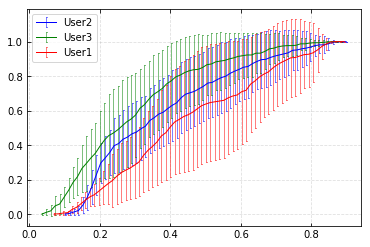

In [14]:
# cumulative distribution of each user over all experiments (Mean + Std)
revisions = {
    'User1': [
        (2, 'Bag-User1'),
        (4, 'Bag-User1'),
        (2, 'Hand-User1'),
        (4, 'Hand-User1'),
        (2, 'Hips-User1'),
        (4, 'Hips-User1'),
        (2, 'Torso-User1'),
        (4, 'Torso-User1'),
    ],
    'User2': [
        (2, 'Bag-User2'),
        (4, 'Bag-User2'),
        (2, 'Hand-User2'),
        (4, 'Hand-User2'),
        (2, 'Hips-User2'),
        (4, 'Hips-User2'),
        (2, 'Torso-User2'),
        (4, 'Torso-User2'),
    ],
    'User3': [
        (2, 'Bag-User3'),
        (4, 'Bag-User3'),
        (2, 'Hand-User3'),
        (4, 'Hand-User3'),
        (2, 'Hips-User3'),
        (4, 'Hips-User3'),
        (2, 'Torso-User3'),
        (4, 'Torso-User3'),        
    ]
}
fig = cumDist_MeanStd_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('cumulative probability')
fig.suptitle('Performances on data generated by each user over all experiments')
fig.savefig("./cumulatives/cumDist_of_each_user_overAllExperiments_MeanStd.svg", format="svg")

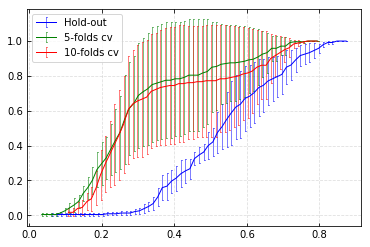

In [7]:
# comparison between validation schemes (5-folds, 10-folds CV, and Hold-out)
revisions = {
    '5-folds cv': [
        # ------------------------------------------- 5 folds
        (4, 'Bag-5folds'),
        (4, 'Hand-5folds'),
        (4, 'Hips-5folds'),
        (4, 'Torso-5folds'),
    ],
    '10-folds cv': [
        # ------------------------------------------- 10 folds
        (4, 'Bag-10folds'),
        (4, 'Hand-10folds'),
        (4, 'Hips-10folds'),
        # (4, 'Torso-10folds'),
    ],
    'Hold-out': [
        (1, 'Bag'),
        (1, 'Hand'),
        (1, 'Hips'),
        (1, 'Torso'),        
    ]
}
fig = cumDist_MeanStd_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('cumulative probability')
fig.suptitle('Performances of models across validation schemes')
fig.savefig("./cumulatives/cumDist_of_each_validationScheme_overAllExperiments_MeanStd.svg", format="svg")